# MNIST digit classifier - Jorge Martínez (AIAO M2BI)

### Load modules

In [62]:
import numpy as np
from pandas import read_csv
from sklearn import preprocessing

# Tensorflow and keras import
from keras import layers, models, utils, callbacks, optimizers

# # Utils to manipulate data
from keras.utils import to_categorical

# # Keras models
from keras.models import Sequential

# # Keras layers
from keras.layers import Dense, Dropout
from keras.layers import TimeDistributed
from keras.layers import add
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten


# # Callback (for learning/optimize)
from keras.callbacks  import TensorBoard
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier


# # Data analysis and protocol
from sklearn.model_selection     import cross_val_score
from sklearn.model_selection     import train_test_split
from sklearn.model_selection     import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# # Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Load data and viasualise it

In [63]:
# Load the data
train_images = np.load('../data/train_images.npy')
train_labels = np.load('../data/train_labels.npy')
test_images = np.load('../data/test_images.npy')
test_labels = np.load('../data/test_labels.npy')

In [64]:
# Check shape of the data
print("Shape of the train images:", train_images.shape)
print("Number of train labels:", train_labels.shape)
print("Shape of the test images:", test_images.shape)
print("Number of test labels:", test_labels.shape)

# Check how many classes there are
print("Classes in the train set:", np.unique(train_labels))
print("Classes in the test set:", np.unique(test_labels))

Shape of the train images: (60000, 28, 28, 1)
Number of train labels: (60000,)
Shape of the test images: (10000, 28, 28, 1)
Number of test labels: (10000,)
Classes in the train set: [0 1 2 3 4 5 6 7 8 9]
Classes in the test set: [0 1 2 3 4 5 6 7 8 9]


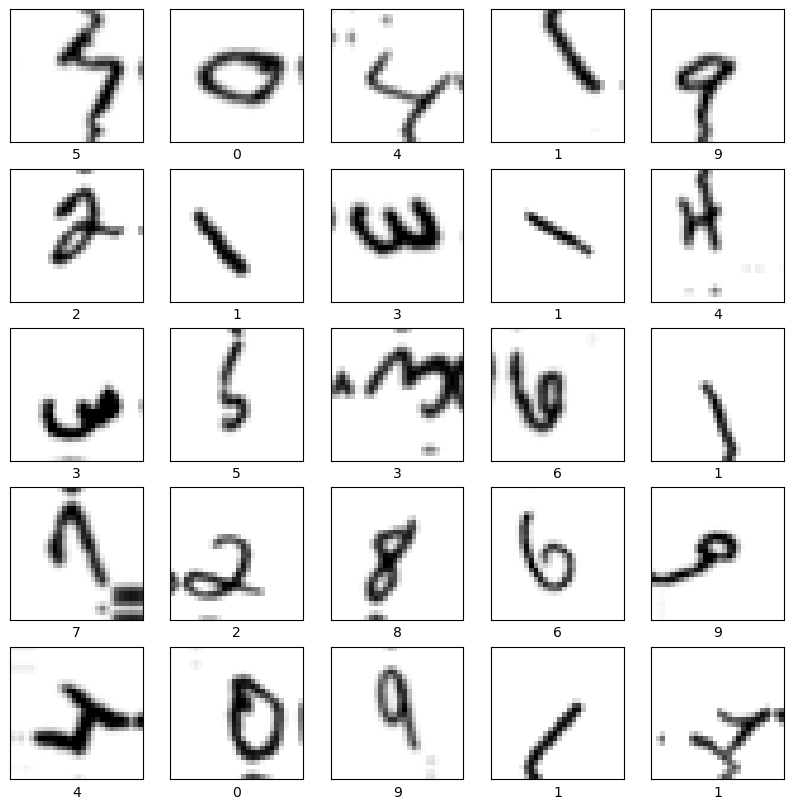

In [65]:
# Visualize the first 25 images of the train set
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

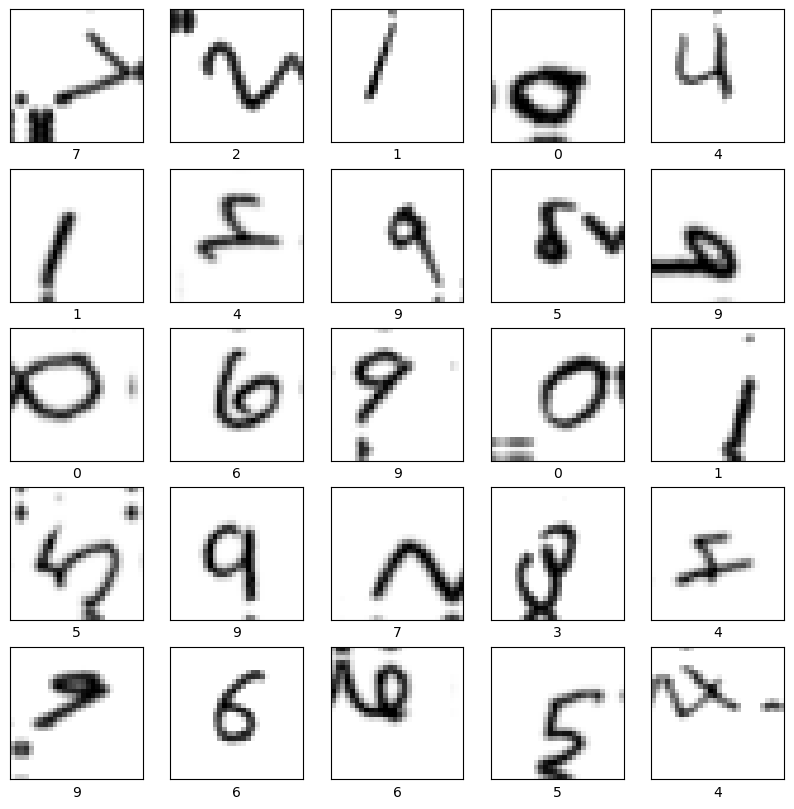

In [66]:
# Visualize the first 25 images of the test set
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])

plt.show()

## DNN model

### Prepare the data

In [67]:
# Pre-format the images
train_images_dnn = train_images.astype("float32")
test_images_dnn = test_images.astype("float32")

num_pixels = train_images_dnn.shape[1] * train_images_dnn.shape[2]

# Flatten images
train_images_dnn = train_images_dnn.reshape(train_images_dnn.shape[0], num_pixels)
test_images_dnn = test_images_dnn.reshape(test_images_dnn.shape[0], num_pixels)

# Normalization
test_images_dnn /= 255

# One-hot encoding the target labels
num_classes = len(np.unique(train_labels))
train_labels_dnn = to_categorical(train_labels, num_classes)
test_labels_dnn = to_categorical(test_labels, num_classes)

### Build the model

In [68]:
def dense_model(num_pixels, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=num_pixels),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer= optimizers.RMSprop(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Then use it like this:
model1 = dense_model(num_pixels, num_classes)
model1.summary()


/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [69]:
# Flatten the images
dense_history = model1.fit(train_images_dnn, train_labels_dnn, validation_split=0.3, epochs=20, batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2757 - loss: 2.0163 - val_accuracy: 0.5629 - val_loss: 1.3122
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5769 - loss: 1.2601 - val_accuracy: 0.6780 - val_loss: 1.0120
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6770 - loss: 0.9855 - val_accuracy: 0.7127 - val_loss: 0.8795
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7323 - loss: 0.8272 - val_accuracy: 0.7454 - val_loss: 0.7849
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7652 - loss: 0.7304 - val_accuracy: 0.7705 - val_loss: 0.7292
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7892 - loss: 0.6510 - val_accuracy: 0.7864 - val_loss: 0.6796
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.5917 - val_accuracy: 0.7991 - val_loss: 0.6398
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8289 - loss: 0.5309 - val_accuracy: 0.

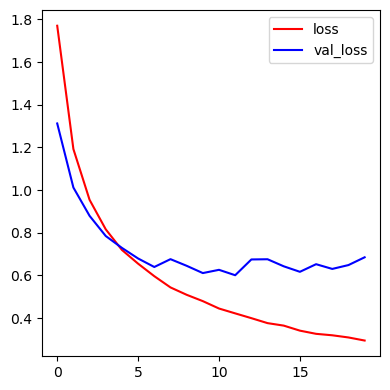

In [70]:
plt.figure(figsize = (4,4))
plt.plot(dense_history.history["loss"], color = "red", label = "loss")
plt.plot(dense_history.history["val_loss"], color = "blue", label = "val_loss")
plt.legend()
plt.tight_layout()

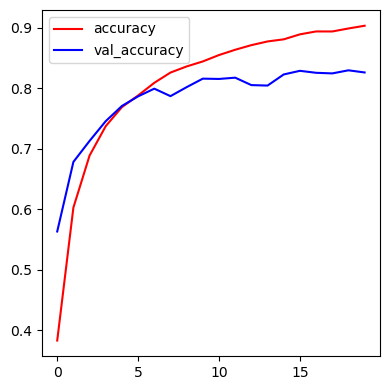

In [71]:
plt.figure(figsize = (4,4))
plt.plot(dense_history.history["accuracy"], color = "red", label = "accuracy")
plt.plot(dense_history.history["val_accuracy"], color = "blue", label = "val_accuracy")
plt.legend()
plt.tight_layout()

### Evaluate the performance of the model

#### Evaluate performance on the train set

In [72]:
labs_pred_proba = model1.predict(train_images_dnn)

print(classification_report(np.argmax(train_labels_dnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5923
           1       0.97      0.98      0.98      6742
           2       0.91      0.90      0.91      5958
           3       0.90      0.91      0.91      6131
           4       0.89      0.89      0.89      5842
           5       0.86      0.89      0.88      5421
           6       0.89      0.95      0.92      5918
           7       0.93      0.90      0.92      6265
           8       0.92      0.87      0.89      5851
           9       0.89      0.85      0.87      5949

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

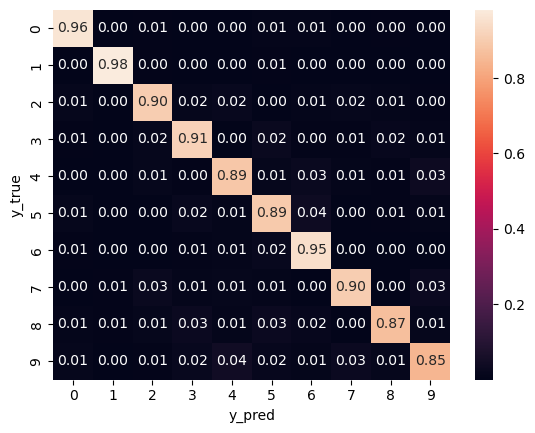

In [73]:
cm = sns.heatmap(confusion_matrix(np.argmax(train_labels_dnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

#### Evaluation on the test set

In [74]:
# On the test set
labs_pred_proba = model1.predict(test_images_dnn)

print(classification_report(np.argmax(test_labels_dnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       980
           1       0.95      0.96      0.96      1135
           2       0.83      0.82      0.82      1032
           3       0.82      0.84      0.83      1010
           4       0.79      0.78      0.78       982
           5       0.73      0.77      0.75       892
           6       0.81      0.89      0.84       958
           7       0.86      0.84      0.85      1028
           8       0.85      0.74      0.79       974
           9       0.81      0.76      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

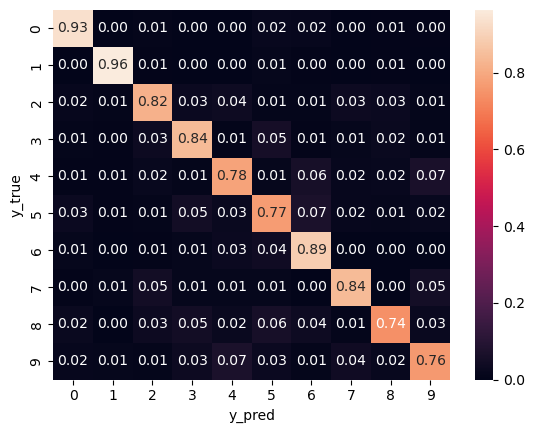

In [75]:
cm = sns.heatmap(confusion_matrix(np.argmax(test_labels_dnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

In [76]:
# Save the model
# model1.save('../res/model_dense.h5')

## CNN model

### Prepare the data

In [77]:
# Pre-format the images
train_images_cnn = train_images.astype("float32")
test_images_cnn = test_images.astype("float32")

# Normalize
test_images_cnn /= 255

# Reshape to have a single channel (black & white)
train_images_cnn = train_images_cnn.reshape(train_images_cnn.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# One hot encoding
num_classes = len(np.unique(train_labels))
train_labels_cnn = to_categorical(train_labels, num_classes)
test_labels_cnn = to_categorical(test_labels, num_classes)

# Shuffle the data
np.random.seed(0)
shuffle_index = np.random.permutation(train_images_cnn.shape[0])
train_images_cnn = train_images_cnn[shuffle_index]
train_labels_cnn = train_labels_cnn[shuffle_index]

### Build the model

In [78]:
def cnn_model(num_pixels, num_classes):
    model = Sequential([
        Conv2D(input_shape = train_images_cnn.shape[1:],
                filters = 32,
                kernel_size = (3,3),
                activation = "relu"),
        MaxPooling2D(pool_size = (2,2)),
        Conv2D(filters = 64,
                kernel_size = (3,3),
                activation = "relu"),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer = optimizers.RMSprop(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Then use it like this:
model2 = cnn_model(num_pixels, num_classes)
model2.summary()


/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [79]:
cnn_history = model2.fit(train_images_cnn, train_labels_cnn, 
                         validation_split=0.3, 
                         epochs=20, 
                         batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3148 - loss: 1.9233 - val_accuracy: 0.6006 - val_loss: 1.2350
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6215 - loss: 1.1507 - val_accuracy: 0.6935 - val_loss: 0.9640
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7150 - loss: 0.8997 - val_accuracy: 0.7498 - val_loss: 0.8006
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7782 - loss: 0.7230 - val_accuracy: 0.7947 - val_loss: 0.6776
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8178 - loss: 0.6031 - val_accuracy: 0.8258 - val_loss: 0.5685
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8423 - loss: 0.5212 - val_accuracy: 0.8447 - val_loss: 0.5083
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8629 - loss: 0.4569 - val_accuracy: 0.8608 - val_loss: 0.4491
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8763 - loss: 0.4089 - val_acc

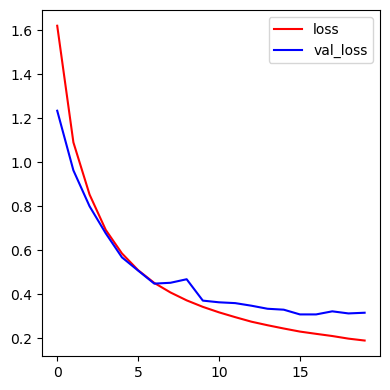

In [80]:
plt.figure(figsize = (4,4))
plt.plot(cnn_history.history["loss"], color = "red", label = "loss")
plt.plot(cnn_history.history["val_loss"], color = "blue", label = "val_loss")
plt.legend()
plt.tight_layout()

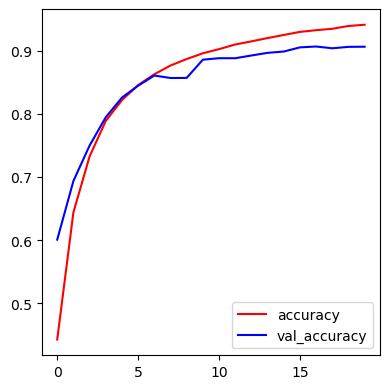

In [81]:
plt.figure(figsize = (4,4))
plt.plot(cnn_history.history["accuracy"], color = "red", label = "accuracy")
plt.plot(cnn_history.history["val_accuracy"], color = "blue", label = "val_accuracy")
plt.legend()
plt.tight_layout()

### Evaluate the performance of the model

#### Evaluate performance on the train set

In [82]:
labs_pred_proba = model2.predict(train_images_cnn)

print(classification_report(np.argmax(train_labels_cnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5923
           1       0.97      0.98      0.98      6742
           2       0.94      0.89      0.91      5958
           3       0.97      0.93      0.95      6131
           4       0.93      0.93      0.93      5842
           5       0.92      0.94      0.93      5421
           6       0.88      0.98      0.93      5918
           7       0.88      0.94      0.91      6265
           8       0.97      0.88      0.92      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.93      0.93     60000
weighted avg       0.94      0.94      0.94     60000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

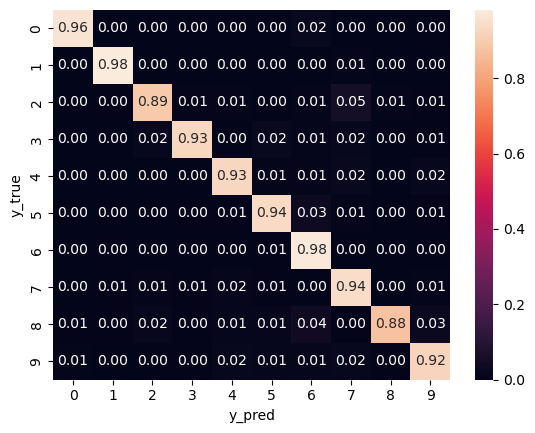

In [83]:
cm = sns.heatmap(confusion_matrix(np.argmax(train_labels_cnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

#### Evaluation on the test set

In [84]:
# On the test set
labs_pred_proba = model2.predict(test_images_cnn)

print(classification_report(np.argmax(test_labels_cnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.88      0.89      1032
           3       0.96      0.93      0.94      1010
           4       0.92      0.90      0.91       982
           5       0.89      0.90      0.89       892
           6       0.86      0.96      0.90       958
           7       0.86      0.91      0.89      1028
           8       0.95      0.82      0.88       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

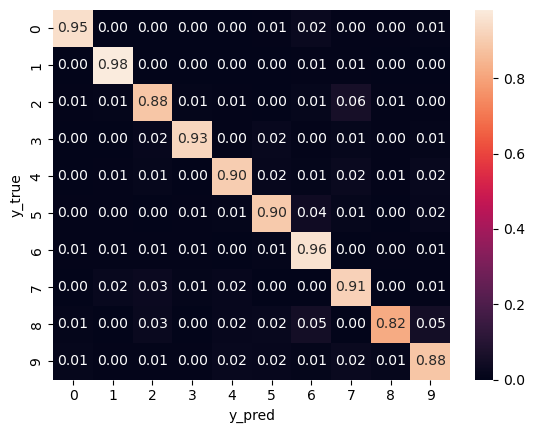

In [85]:
cm = sns.heatmap(confusion_matrix(np.argmax(test_labels_cnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

In [86]:
# Save the model
# model2.save('../res/model_conv.h5')

## CNN model - optim.

### Build the model

In [87]:
def cnn_model(num_pixels, num_classes):
    model = Sequential([
        Conv2D(input_shape = train_images_cnn.shape[1:],
                filters = 32,
                kernel_size = (3,3),
                activation = "relu"),
        MaxPooling2D(pool_size = (2,2)),
        Conv2D(filters = 64,
                kernel_size = (3,3),
                activation = "relu"),
        MaxPooling2D(pool_size = (2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(units = 128,
                activation = "relu"),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizers.RMSprop(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Then use it like this:
model2 = cnn_model(num_pixels, num_classes)
model2.summary()


/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [88]:
cnn_history = model2.fit(train_images_cnn, train_labels_cnn, 
                         validation_split=0.3, 
                         epochs=20, 
                         batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3725 - loss: 1.7802 - val_accuracy: 0.7487 - val_loss: 0.8016
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7691 - loss: 0.7268 - val_accuracy: 0.8541 - val_loss: 0.4710
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8535 - loss: 0.4668 - val_accuracy: 0.8877 - val_loss: 0.3664
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8950 - loss: 0.3400 - val_accuracy: 0.9092 - val_loss: 0.2972
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9128 - loss: 0.2833 - val_accuracy: 0.9256 - val_loss: 0.2444
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9263 - loss: 0.2348 - val_accuracy: 0.9277 - val_loss: 0.2340
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9380 - loss: 0.2017 - val_accuracy: 0.9306 - val_loss: 0.2284
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9436 - loss: 0.1750 - 

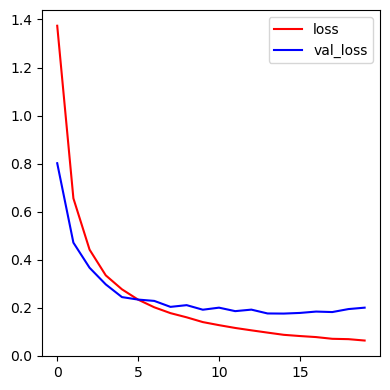

In [89]:
plt.figure(figsize = (4,4))
plt.plot(cnn_history.history["loss"], color = "red", label = "loss")
plt.plot(cnn_history.history["val_loss"], color = "blue", label = "val_loss")
plt.legend()
plt.tight_layout()

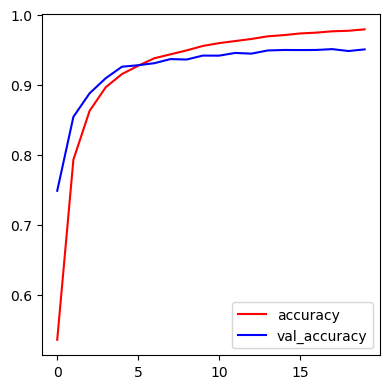

In [90]:
plt.figure(figsize = (4,4))
plt.plot(cnn_history.history["accuracy"], color = "red", label = "accuracy")
plt.plot(cnn_history.history["val_accuracy"], color = "blue", label = "val_accuracy")
plt.legend()
plt.tight_layout()

### Evaluate the performance of the model

#### Evaluate performance on the train set

In [91]:
labs_pred_proba = model2.predict(train_images_cnn)

print(classification_report(np.argmax(train_labels_cnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.97      0.98      5958
           3       0.99      0.97      0.98      6131
           4       0.98      0.98      0.98      5842
           5       0.98      0.98      0.98      5421
           6       0.98      0.99      0.98      5918
           7       0.96      0.99      0.97      6265
           8       0.98      0.97      0.98      5851
           9       0.97      0.98      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

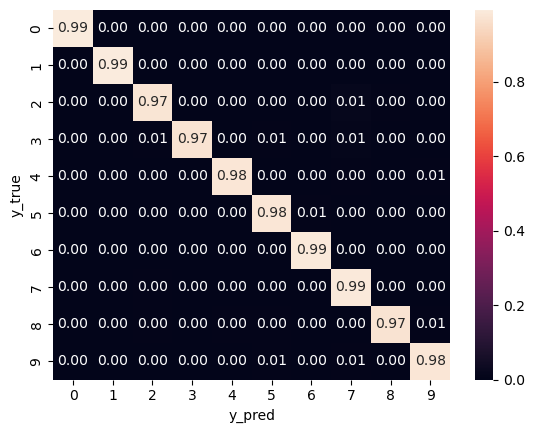

In [92]:
cm = sns.heatmap(confusion_matrix(np.argmax(train_labels_cnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

#### Evaluation on the test set

In [93]:
# On the test set
labs_pred_proba = model2.predict(test_images_cnn)

print(classification_report(np.argmax(test_labels_cnn, axis = 1), np.argmax(labs_pred_proba, axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.98      0.94      0.96      1010
           4       0.95      0.93      0.94       982
           5       0.93      0.94      0.93       892
           6       0.94      0.96      0.95       958
           7       0.91      0.95      0.93      1028
           8       0.95      0.92      0.94       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



[Text(0.5, 23.52222222222222, 'y_pred'),
 Text(50.722222222222214, 0.5, 'y_true')]

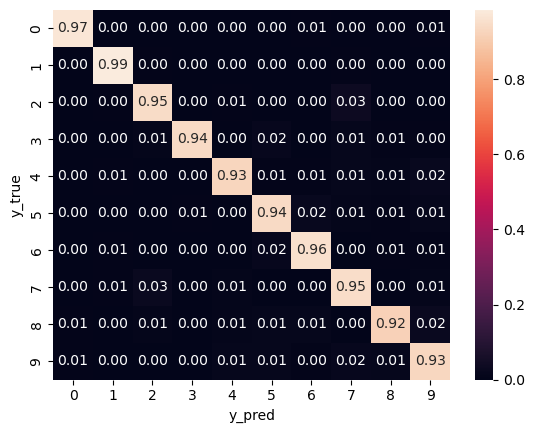

In [94]:
cm = sns.heatmap(confusion_matrix(np.argmax(test_labels_cnn, axis = 1),  np.argmax(labs_pred_proba, axis = 1), normalize = "true"),
                 annot = True, fmt='.2f')
cm.set(xlabel = "y_pred", ylabel = "y_true")

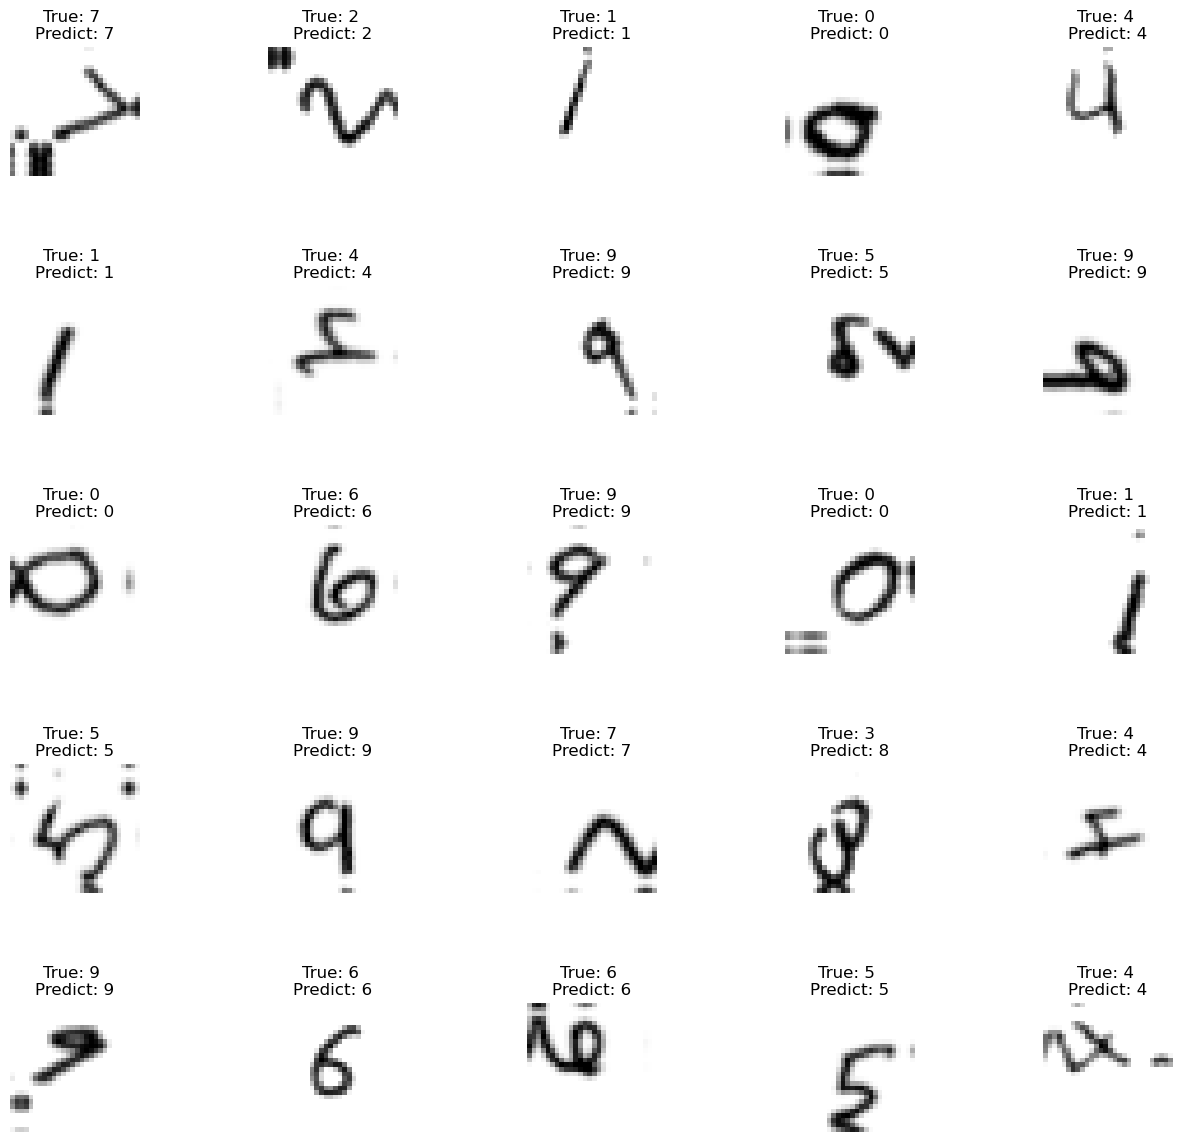

In [108]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i], cmap=plt.cm.binary)
    true_label = test_labels[i]
    predicted_label = np.argmax(labs_pred_proba[i])
    axes[i].set_title("True: %s \nPredict: %s" % (true_label, predicted_label))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

In [95]:
# Save the model
# model2.save('../res/model_conv_opt.h5')

#### Evaluation with cross-validation

In [99]:
training = KerasClassifier(build_fn=cnn_model, num_pixels=num_pixels, num_classes=num_classes,
                           epochs=20, batch_size=100, verbose=0)

kfold = KFold(n_splits=5, shuffle=True)

cv_results = cross_val_score(training, train_images_cnn, 
                             train_labels_cnn, cv=kfold)

print("Cross validation accuracies:", cv_results)
print("Results Cross validation : %.2f%% (%.2f%%)"%(cv_results.mean()*100, cv_results.std()*100))

/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/miniconda3/envs/aiao-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: D

Cross validation accuracies: [0.95       0.95058333 0.9515     0.95325    0.94925   ]
Results Cross validation : 95.09% (0.14%)
